<a href="https://colab.research.google.com/github/ProgrammerMahin/courseratask/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import time

In [4]:
df= pd.read_csv("/content/drive/MyDrive/Colab_datasets/dataset_phishing.csv")

In [5]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [6]:
df.shape

(11430, 89)

In [7]:
df.status=[0 if x=='legitimate' else x for x in df.status ]
df.status=[1 if x=='phishing' else x for x in df.status]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [9]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [9]:
df.shape

(11430, 89)

In [10]:
import seaborn as sns

<Axes: xlabel='status', ylabel='count'>

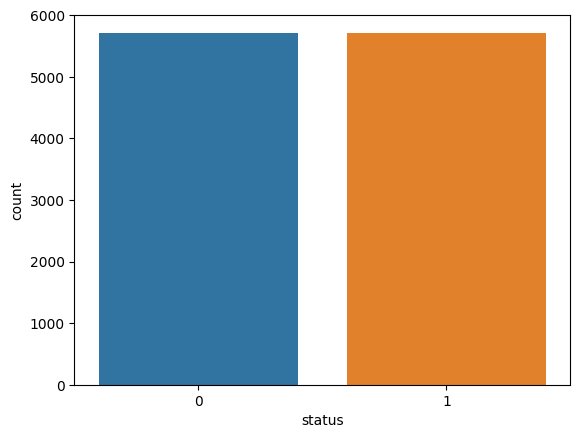

In [11]:
sns.countplot(x="status",data=df)

In [12]:
df['status'].value_counts()

0    5715
1    5715
Name: status, dtype: int64

In [13]:
df=df.drop(columns ='url', axis=1)

In [14]:
df.shape

(11430, 88)

In [15]:
X= df.drop(columns='status', axis=1)
y= df.status

In [16]:
from sklearn.feature_selection import SelectKBest,f_classif

In [17]:
# Select top 20 features using SelectKBest and f_classif
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['length_url', 'length_hostname', 'ip', 'nb_qm', 'nb_eq', 'nb_slash',
       'nb_www', 'ratio_digits_url', 'ratio_digits_host', 'tld_in_subdomain',
       'prefix_suffix', 'shortest_word_host', 'longest_word_path',
       'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'domain_in_title', 'domain_age', 'google_index', 'page_rank'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [18]:
data= df[[ 'length_hostname'
       ]]

<Axes: >

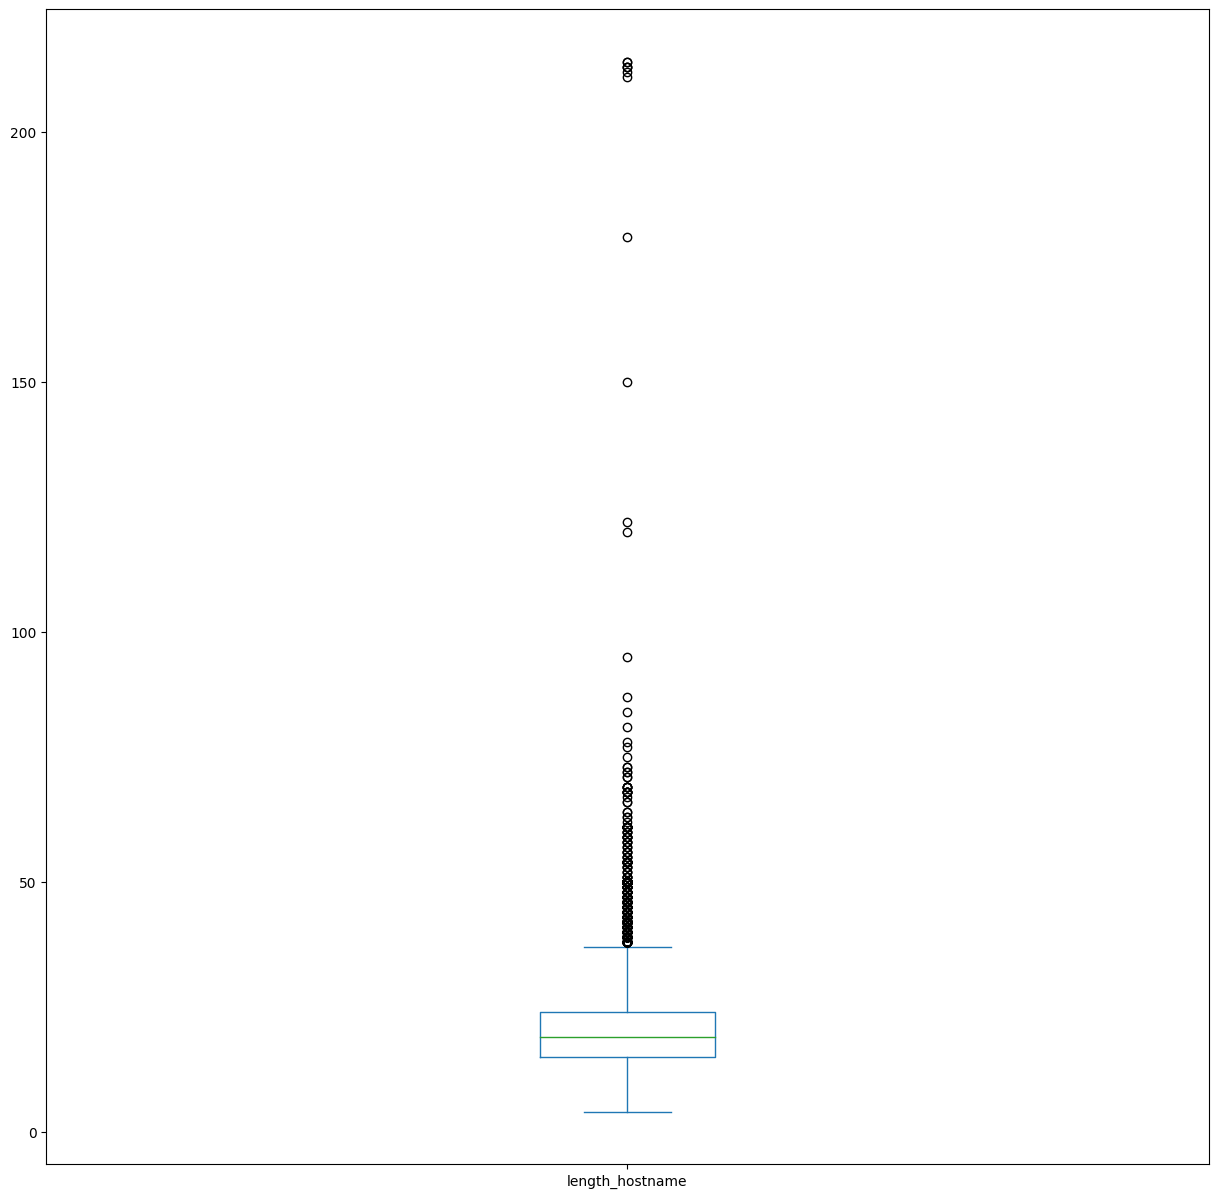

In [19]:
data.plot.box(figsize=(15, 15))

In [20]:
import matplotlib.pyplot as plt

In [21]:
data= df[['length_url', 'length_hostname', 'domain_age',
       'domain_registration_length', 'web_traffic','status','page_rank']]

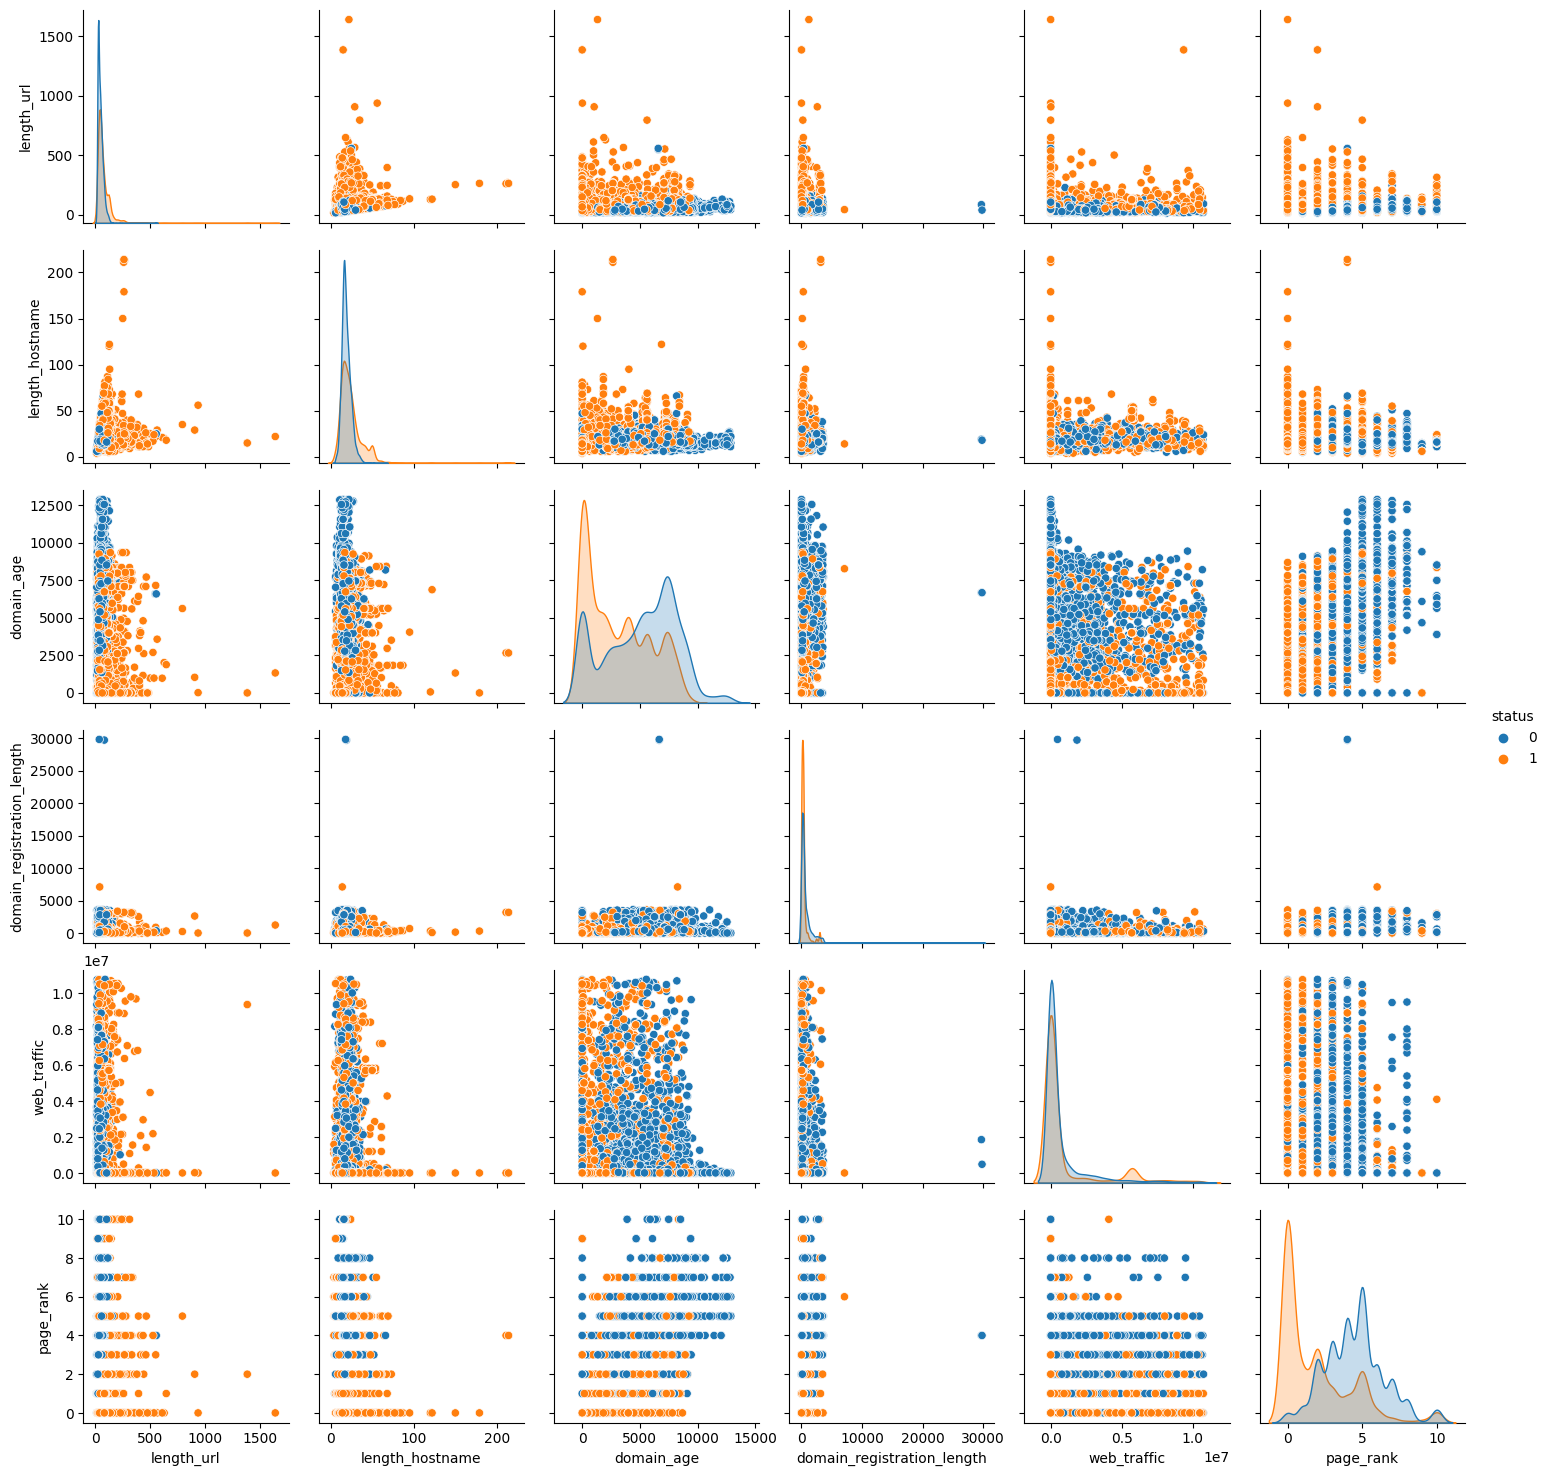

In [22]:
sns.pairplot(data=data, hue="status")

# plt.savefig('/content/drive/MyDrive/Dataset/Untitled folder (1)/Plotting.pdf', bbox_inches='tight', transparent = True, dpi=300)

In [23]:
X=df.drop('status',axis=1)
Y=df.status

Explained Variance Ratio: [9.99997423e-01 2.41473156e-06 1.52668559e-07 6.86757275e-09
 9.01875249e-10 7.97115238e-10 3.82716479e-10 2.25071474e-10
 2.16316978e-10 1.26616180e-10 3.10321812e-11 9.03292911e-12
 6.89764672e-12 4.21283487e-12 2.72826945e-12 2.17711318e-12
 1.70370377e-12 1.44125717e-12 1.10121523e-12 9.96347632e-13
 7.78857454e-13 5.72937211e-13 5.05171218e-13 4.12507064e-13
 2.32268995e-13 1.88713988e-13 1.36057082e-13 1.24969957e-13
 1.16159622e-13 6.28747525e-14 6.08687600e-14 6.00217788e-14
 5.20265595e-14 4.73402468e-14 4.35314243e-14 3.79332965e-14
 3.56139660e-14 3.20788554e-14 3.10042513e-14 3.09102573e-14
 2.73717214e-14 2.49613253e-14 2.26373469e-14 2.16671193e-14
 1.86539234e-14 1.80565028e-14 1.73815629e-14 1.68631645e-14
 1.48614299e-14 1.38831052e-14 1.32483997e-14 1.22373469e-14
 1.21395925e-14 9.81766048e-15 8.42781588e-15 6.42444423e-15
 5.75294462e-15 5.24118934e-15 4.52660440e-15 4.06184109e-15
 3.67582439e-15 3.40287651e-15 3.11098690e-15 2.79162208e-1

Text(0.5, 1.0, 'PCA')

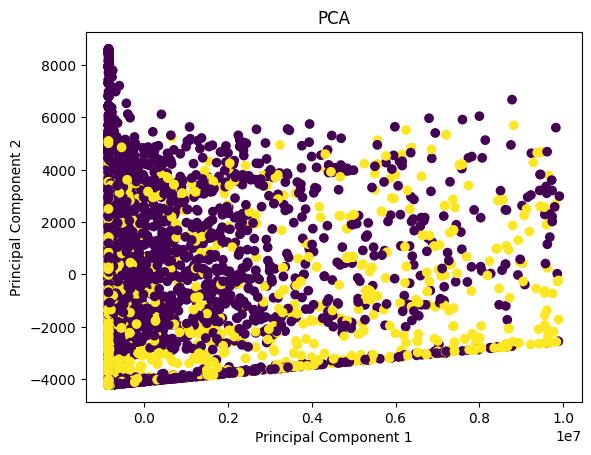

In [24]:
from sklearn.decomposition import PCA

# Initialize the PCA model with the desired number of components
# In this example, I'm using 2 components for visualization purposes
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X)

# 'X_pca' now contains the principal components of your data

# If you want to see the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the PCA-transformed data
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
# plt.savefig('PC2D.pdf', bbox_inches='tight', transparent = True, dpi=300)

Text(0.5, 0.92, '3D PCA Plot')

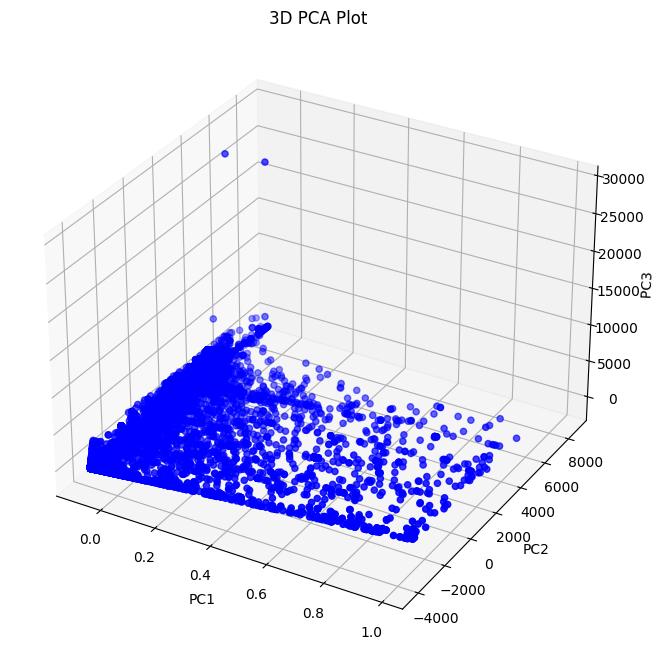

In [25]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# # Generate some example data
# np.random.seed(42)
# data = np.random.rand(100, 5)  # Replace this with your own dataset

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Visualize the 3D PCA plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('  PC3')
ax.set_title('3D PCA Plot')

# plt.savefig('PC3D.pdf', bbox_inches='tight', transparent = True, dpi=300)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

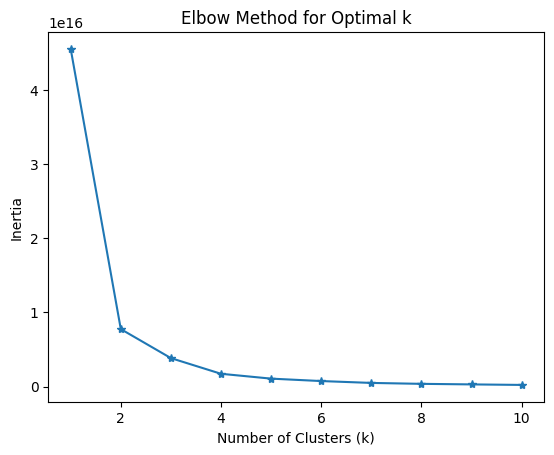

In [26]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# # Generate synthetic data for clustering (you can replace this with your own dataset)
# X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.60)

# Calculate the inertia for different values of k
inertia_values = []
for k in range(1, 11):  # Trying k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='*')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
# plt.savefig('ELBOWMETHOD.pdf', bbox_inches='tight', transparent = True, dpi=300)

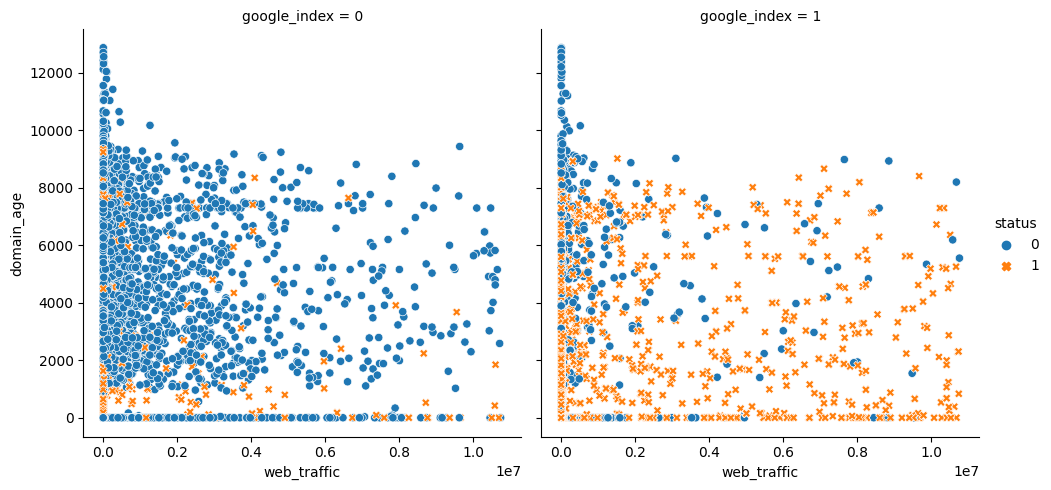

In [27]:
sns.relplot(
    data=df,
    x="web_traffic",
    y="domain_age",
    col="google_index",
    hue="status",
    style="status"
)
# plt.savefig('sns_replot.pdf', bbox_inches='tight', transparent = True, dpi=300)

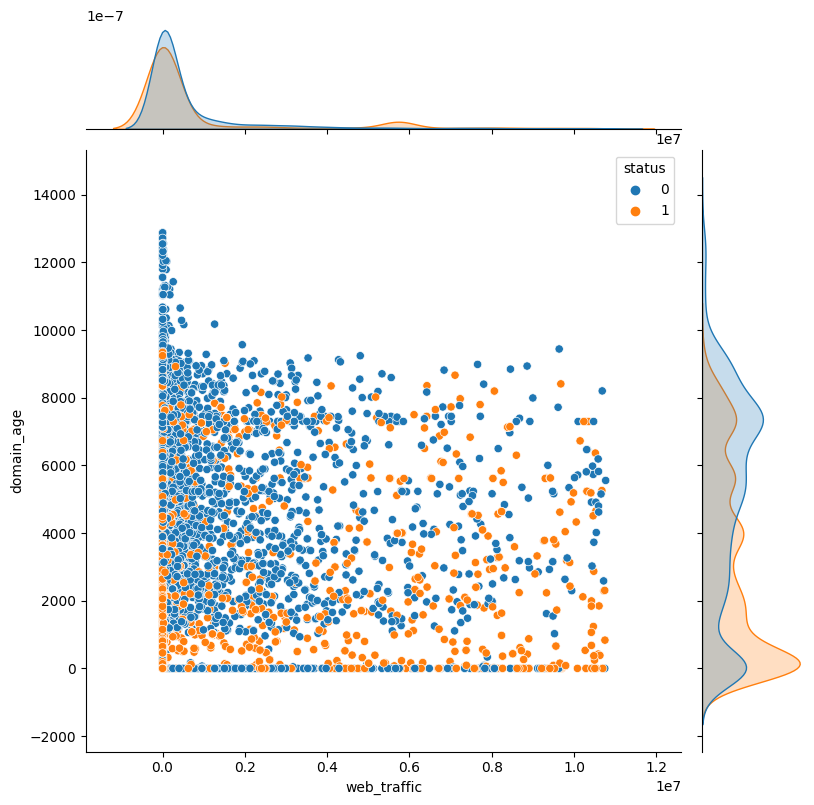

In [28]:
sns.jointplot(
    data=data,
    x="web_traffic",
    y="domain_age",
    hue="status",
    height=8
)
# plt.savefig('/content/drive/MyDrive/Dataset/Untitled folder (1)/sns_jointplot2.pdf', bbox_inches='tight', transparent = True, dpi=300)

In [29]:
import plotly.express as px

fig = px.scatter(
    df,
    x="web_traffic",
    y="domain_age",
    color ='page_rank'
)
fig.show()

In [30]:
fig = px.scatter(
    df,
    x="web_traffic",
    y="domain_age",
    color="page_rank", facet_col="google_index", facet_row="domain_in_title"
)
fig.show()

Text(158.08159722222223, 0.5, '')

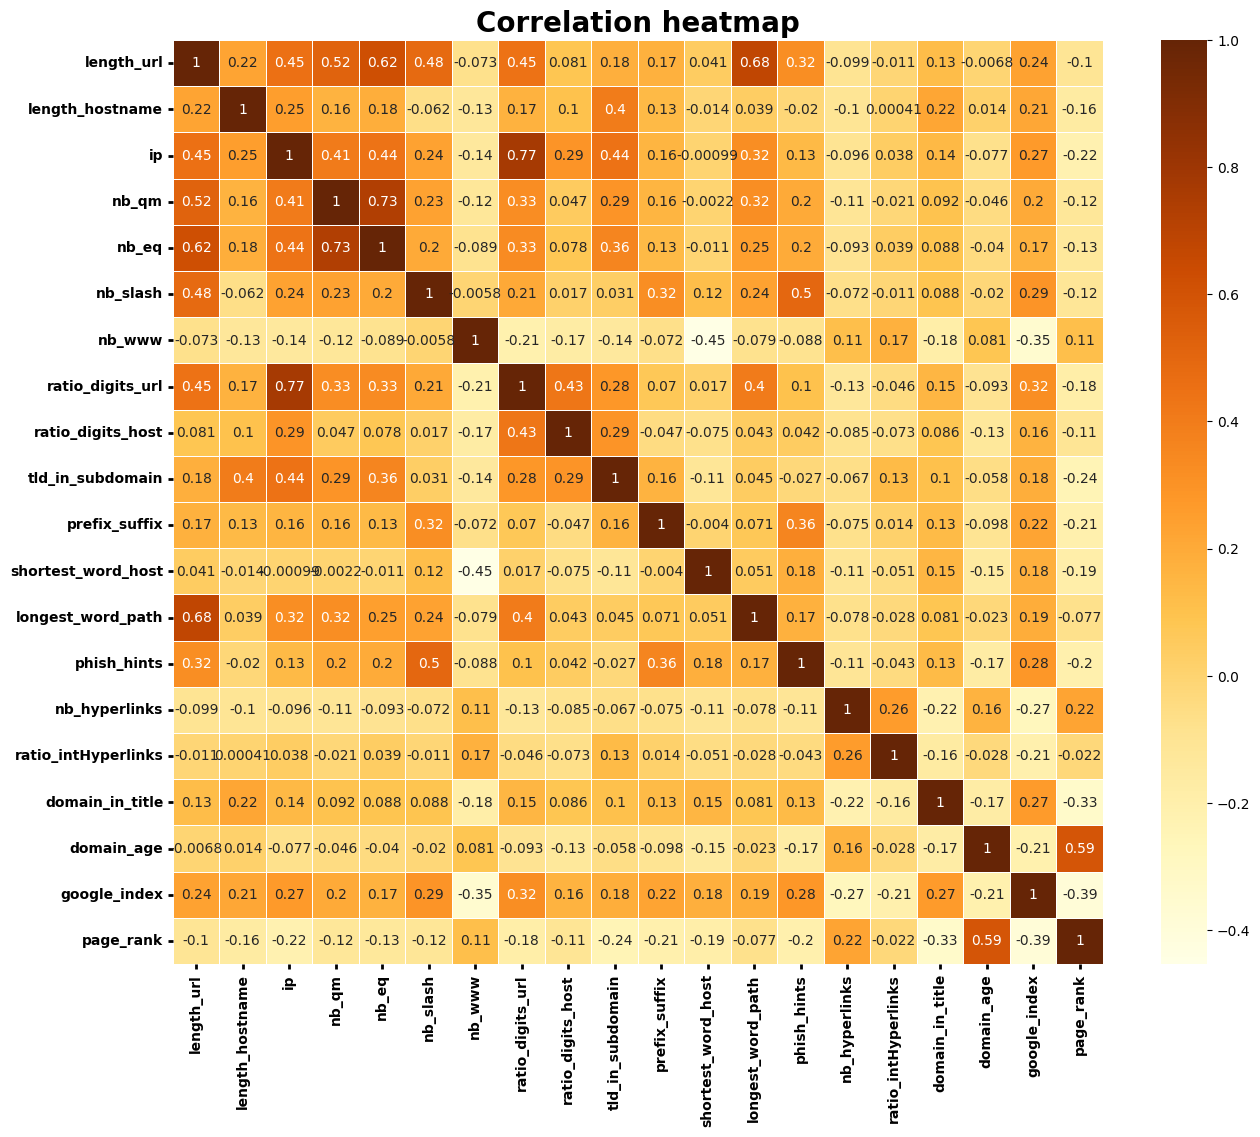

In [31]:
plt.rcParams['figure.figsize'] = (15,12)
ax = sns.heatmap(df[['length_url', 'length_hostname', 'ip', 'nb_qm', 'nb_eq', 'nb_slash',
       'nb_www', 'ratio_digits_url', 'ratio_digits_host', 'tld_in_subdomain',
       'prefix_suffix', 'shortest_word_host', 'longest_word_path',
       'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'domain_in_title', 'domain_age', 'google_index', 'page_rank']].corr(), annot = True, linewidth = 0.5, cmap= 'YlOrBr')
plt.title('Correlation heatmap', fontweight='bold', fontsize = 20)
ax.tick_params(width = 2)
ax.tick_params(labelsize=10)
for label in ax.get_xticklabels() + ax.get_yticklabels():
  label.set_weight('bold')
ax.set_xlabel(ax.get_xlabel(), fontsize = 10, fontweight = 'bold')
ax.set_ylabel(ax.get_ylabel(), fontsize = 10, fontweight = 'bold')
# plt.savefig('Correlation heatmap.pdf', bbox_inches='tight', dpi=300)

In [32]:
fig = px.violin(
    data,
    x="web_traffic",
    y="domain_age",
    color="page_rank", box=True, points="all")
fig.show()

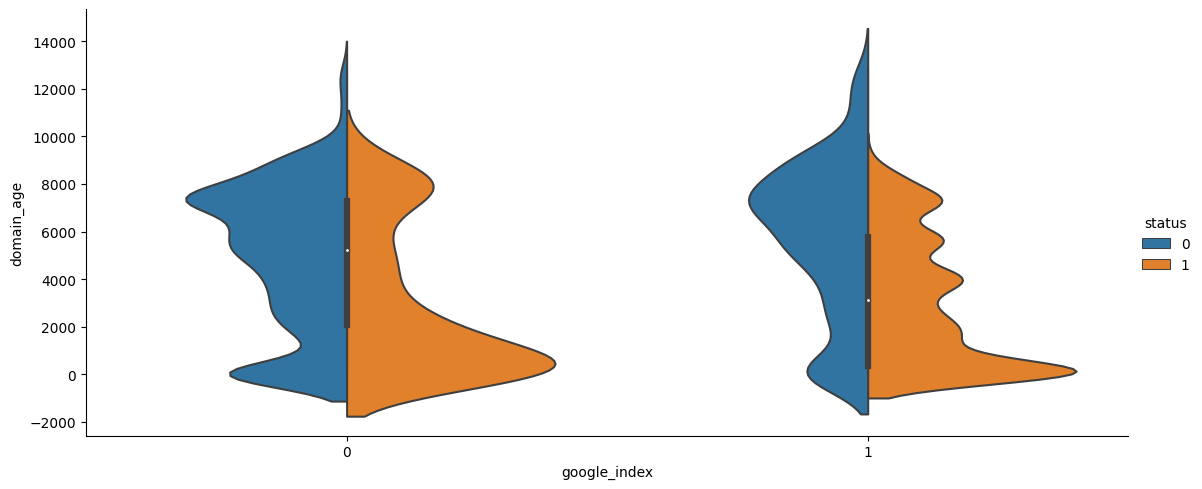

In [33]:
sns.catplot(
    df,
    kind="violin",
    x="google_index",
    y="domain_age",
    hue="status",
    split=True,
    height=5,
    aspect=2.3,
)
# plt.savefig('violin_plot.pdf', bbox_inches='tight', dpi=300)

In [34]:
k_best = SelectKBest(score_func=f_classif, k=40)
# Select top 2 features


# Fit the SelectKBest object to the data

k_best.fit(X, y)

# Get scores and feature indices of the selected features

feature_scores = k_best.scores_
selected_features_indices = k_best.get_support(indices=True)

# Print scores and indices of selected features


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 8 59 61 63 68 71] are constant.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



In [35]:
print("Feature Scores:", feature_scores[selected_features_indices])
print("Indices of Selected Features:", selected_features_indices)

Feature Scores: [  752.67105625   688.16893037  1319.2009874    511.74852093
   238.27877196  1083.82036744   342.35327406   658.33245898
   712.58861452  2797.67165619   286.11181764  1662.74881581
   605.60513195   521.38249972   190.83879018   552.13845544
   437.45590737   598.51756591   476.89401603   541.56497584
   330.14033942   444.54228876   462.66546734  1448.44980013
   241.79516005  1520.02197039   723.33592469   266.02375818
   250.87897379   402.27380216   443.73802016   229.82002767
   354.25249087   511.8210154   1521.81896372   352.99485615
   306.90243694  1414.6191772  13127.79086405  4041.60804677]
Indices of Selected Features: [ 0  1  2  3  5  6  7  9 13 20 21 25 26 30 31 33 39 42 44 46 47 48 49 50
 55 56 57 62 66 67 69 70 74 77 78 79 81 82 85 86]


In [36]:
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif, f_regression,chi2

In [37]:
selected_features=['length_url', 'length_hostname', 'ip', 'nb_qm', 'nb_eq', 'nb_slash',
       'nb_www', 'ratio_digits_url', 'ratio_digits_host', 'tld_in_subdomain',
       'prefix_suffix', 'shortest_word_host', 'longest_word_path',
       'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'domain_in_title', 'domain_age', 'google_index', 'page_rank']

In [38]:
X[selected_features].shape

(11430, 20)

In [39]:
column_names = X[selected_features].columns.tolist()

In [40]:

column_names

['length_url',
 'length_hostname',
 'ip',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_transformed = scaler.fit_transform(X[selected_features])

In [42]:
print(X_transformed)

[[1.53468386e-02 7.14285714e-02 0.00000000e+00 ... 8.53639609e-04
  1.00000000e+00 4.00000000e-01]
 [3.99017802e-02 9.04761905e-02 1.00000000e+00 ... 4.48471209e-01
  1.00000000e+00 2.00000000e-01]
 [6.99815838e-02 2.19047619e-01 1.00000000e+00 ... 3.11656061e-01
  1.00000000e+00 0.00000000e+00]
 ...
 [5.70902394e-02 5.71428571e-02 1.00000000e+00 ... 6.61725904e-01
  1.00000000e+00 1.00000000e+00]
 [1.59607121e-02 1.23809524e-01 0.00000000e+00 ... 2.21015055e-01
  0.00000000e+00 4.00000000e-01]
 [2.85451197e-01 4.76190476e-02 1.00000000e+00 ... 8.53639609e-04
  1.00000000e+00 0.00000000e+00]]


In [43]:
X_transformed.shape

(11430, 20)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [76]:
rf=DecisionTreeClassifier()

In [46]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report, recall_score

In [47]:
import matplotlib.pyplot as plt

In [48]:
from sklearn.metrics import make_scorer

In [49]:
def mahin(model):
    start_time = time.time()
    model.fit(X_transformed, y)
    y_pred = model.predict(X_transformed)
    # Cross-validation accuracy
    cv_acc = cross_val_score(model, X_transformed, y, cv=5, scoring='accuracy').mean()

    # Cross-validation precision
    cv_prec = cross_val_score(model, X_transformed, y, cv=5, scoring='precision').mean()

    # Cross-validation recall
    cv_rec = cross_val_score(model, X_transformed, y, cv=5, scoring='recall').mean()

    # Cross-validation F1 score
    cv_f1 = cross_val_score(model, X_transformed, y, cv=5, scoring='f1').mean()

    # Cross-validation specificity
    def specificity(y, y_pred):
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        return tn / (tn + fp)

    cv_spec = make_scorer(specificity)
    cv_spec = cross_val_score(model, X_transformed, y, cv=5, scoring=cv_spec).mean()
    end_time = time.time()

    print("cv accuracy: %0.4f" % cv_acc)
    print("cv precision: %0.4f" %cv_prec)
    print("cv_rec: %0.4f" % cv_rec)
    print("cv_f1: %0.4f" %cv_f1)
    print("cv_spec: %0.4f" %cv_spec)
    print("Time taken for cross-validation:", end_time - start_time, "seconds")

In [50]:
mahin(SVC())

cv accuracy: 0.9329
cv precision: 0.9313
cv_rec: 0.9347
cv_f1: 0.9330
cv_spec: 0.9311
Time taken for cross-validation: 46.54754185676575 seconds


In [51]:
mahin(RandomForestClassifier())

cv accuracy: 0.9614
cv precision: 0.9622
cv_rec: 0.9610
cv_f1: 0.9616
cv_spec: 0.9615
Time taken for cross-validation: 35.90948534011841 seconds


In [52]:
mahin(DecisionTreeClassifier())

cv accuracy: 0.9335
cv precision: 0.9336
cv_rec: 0.9393
cv_f1: 0.9350
cv_spec: 0.9307
Time taken for cross-validation: 1.654841661453247 seconds


In [53]:
max_acc=[]
max_prec=[]
max_recall=[]
max_f1=[]
max_spec=[]
for i in np.arange(1,100,1):
    start_time = time.time()
    model=RandomForestClassifier(n_estimators=i)


    model.fit(X_transformed, y)
    y_pred = model.predict(X_transformed)
    # Cross-validation accuracy
    cv_acc = cross_val_score(model, X_transformed, y, cv=5, scoring='accuracy').mean()
    if(cv_acc>.963):
      max_acc.append(cv_acc)
      # Cross-validation precision
      cv_prec = cross_val_score(model, X_transformed, y, cv=5, scoring='precision').mean()
      max_prec.append(cv_prec)
      # Cross-validation recall
      cv_rec = cross_val_score(model, X_transformed, y, cv=5, scoring='recall').mean()
      max_recall.append(cv_rec)
      # Cross-validation F1 score
      cv_f1 = cross_val_score(model, X_transformed, y, cv=5, scoring='f1').mean()
      max_f1.append(cv_f1)
      # Cross-validation specificity
      def specificity(y, y_pred):
          tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
          return tn / (tn + fp)

      cv_spec = make_scorer(specificity)
      cv_spec = cross_val_score(model, X_transformed, y, cv=5, scoring=cv_spec).mean()
      max_spec.append(cv_spec)
      end_time = time.time()
      print("Time taken for cross-validation:", end_time - start_time, "seconds")

print("cv accuracy: %0.4f" % max(max_acc))
print("cv precision: %0.4f" % max(max_prec))
print("cv_rec: %0.4f" % max(max_recall))
print("cv_f1: %0.4f" % max(max_f1))
print("cv_spec: %0.4f" % max(max_spec))

Time taken for cross-validation: 22.77560329437256 seconds
Time taken for cross-validation: 34.46220827102661 seconds
cv accuracy: 0.9633
cv precision: 0.9608
cv_rec: 0.9631
cv_f1: 0.9619
cv_spec: 0.9619


In [54]:
max_acc=[]
max_prec=[]
max_recall=[]
max_f1=[]
max_spec=[]
for i in np.arange(1,100,1):
    start_time = time.time()
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(X_transformed, y)
    y_pred = model.predict(X_transformed)
    # Cross-validation accuracy
    cv_acc = cross_val_score(model, X_transformed, y, cv=5, scoring='accuracy').mean()
    if(cv_acc>.935):
      max_acc.append(cv_acc)
      # Cross-validation precision
      cv_prec = cross_val_score(model, X_transformed, y, cv=5, scoring='precision').mean()
      max_prec.append(cv_prec)
      # Cross-validation recall
      cv_rec = cross_val_score(model, X_transformed, y, cv=5, scoring='recall').mean()
      max_recall.append(cv_rec)
      # Cross-validation F1 score
      cv_f1 = cross_val_score(model, X_transformed, y, cv=5, scoring='f1').mean()
      max_f1.append(cv_f1)
      # Cross-validation specificity
      def specificity(y, y_pred):
          tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
          return tn / (tn + fp)

      cv_spec = make_scorer(specificity)
      cv_spec = cross_val_score(model, X_transformed, y, cv=5, scoring=cv_spec).mean()
      max_spec.append(cv_spec)
      end_time = time.time()
      print("Time taken for cross-validation:", end_time - start_time, "seconds")
print("cv accuracy: %0.4f" % max(max_acc))
print("cv precision: %0.4f" % max(max_prec))
print("cv_rec: %0.4f" % max(max_recall))
print("cv_f1: %0.4f" % max(max_f1))
print("cv_spec: %0.4f" % max(max_spec))

Time taken for cross-validation: 1.194913625717163 seconds
Time taken for cross-validation: 1.3270595073699951 seconds
Time taken for cross-validation: 1.3769161701202393 seconds
Time taken for cross-validation: 1.8050847053527832 seconds
Time taken for cross-validation: 2.1576499938964844 seconds
Time taken for cross-validation: 2.238401412963867 seconds
Time taken for cross-validation: 2.084764242172241 seconds
Time taken for cross-validation: 1.6145153045654297 seconds
Time taken for cross-validation: 1.620180606842041 seconds
Time taken for cross-validation: 1.6277086734771729 seconds
Time taken for cross-validation: 1.9497675895690918 seconds
Time taken for cross-validation: 2.3254711627960205 seconds
Time taken for cross-validation: 1.7913048267364502 seconds
Time taken for cross-validation: 1.6550283432006836 seconds
Time taken for cross-validation: 1.634270191192627 seconds
Time taken for cross-validation: 1.632516622543335 seconds
Time taken for cross-validation: 1.66098523139

In [55]:
max_acc=[]
max_prec=[]
max_recall=[]
max_f1=[]
max_spec=[]
for i in np.arange(0.1,100,0.1):
    start_time = time.time()
    model=SVC(C=i)

    model.fit(X_transformed, y)
    y_pred = model.predict(X_transformed)
    # Cross-validation accuracy
    cv_acc = cross_val_score(model, X_transformed, y, cv=5, scoring='accuracy').mean()
    if(cv_acc>.933):
      max_acc.append(cv_acc)
      # Cross-validation precision
      cv_prec = cross_val_score(model, X_transformed, y, cv=5, scoring='precision').mean()
      max_prec.append(cv_prec)
      # Cross-validation recall
      cv_rec = cross_val_score(model, X_transformed, y, cv=5, scoring='recall').mean()
      max_recall.append(cv_rec)
      # Cross-validation F1 score
      cv_f1 = cross_val_score(model, X_transformed, y, cv=5, scoring='f1').mean()
      max_f1.append(cv_f1)
      # Cross-validation specificity
      def specificity(y, y_pred):
          tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
          return tn / (tn + fp)

      cv_spec = make_scorer(specificity)
      cv_spec = cross_val_score(model, X_transformed, y, cv=5, scoring=cv_spec).mean()
      max_spec.append(cv_spec)
      end_time = time.time()
      print("Time taken for cross-validation:", end_time - start_time, "seconds")

print("cv accuracy: %0.4f" % max(max_acc))
print("cv precision: %0.4f" % max(max_prec))
print("cv_rec: %0.4f" % max(max_recall))
print("cv_f1: %0.4f" % max(max_f1))
print("cv_spec: %0.4f" % max(max_spec))

Time taken for cross-validation: 39.9102725982666 seconds
Time taken for cross-validation: 41.98046088218689 seconds
Time taken for cross-validation: 38.73569178581238 seconds
Time taken for cross-validation: 38.74785614013672 seconds
Time taken for cross-validation: 41.2796311378479 seconds
Time taken for cross-validation: 39.104533433914185 seconds
Time taken for cross-validation: 41.21108531951904 seconds
Time taken for cross-validation: 37.95023775100708 seconds
Time taken for cross-validation: 39.74446177482605 seconds
Time taken for cross-validation: 39.42678236961365 seconds
Time taken for cross-validation: 37.90604829788208 seconds
Time taken for cross-validation: 38.149266719818115 seconds
Time taken for cross-validation: 38.034977436065674 seconds
Time taken for cross-validation: 40.10188961029053 seconds
Time taken for cross-validation: 40.76547431945801 seconds
Time taken for cross-validation: 38.74744415283203 seconds
Time taken for cross-validation: 37.1689715385437 secon

KeyboardInterrupt: ignored

In [56]:
print("cv accuracy: %0.4f" % max(max_acc))
print("cv precision: %0.4f" % max(max_prec))
print("cv_rec: %0.4f" % max(max_recall))
print("cv_f1: %0.4f" % max(max_f1))
print("cv_spec: %0.4f" % max(max_spec))

cv accuracy: 0.9423
cv precision: 0.9445
cv_rec: 0.9403
cv_f1: 0.9421
cv_spec: 0.9447


In [50]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.6 MB/s eta 0:00:00


In [51]:
X_transformed

array([[1.53468386e-02, 7.14285714e-02, 0.00000000e+00, ...,
        8.53639609e-04, 1.00000000e+00, 4.00000000e-01],
       [3.99017802e-02, 9.04761905e-02, 1.00000000e+00, ...,
        4.48471209e-01, 1.00000000e+00, 2.00000000e-01],
       [6.99815838e-02, 2.19047619e-01, 1.00000000e+00, ...,
        3.11656061e-01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.70902394e-02, 5.71428571e-02, 1.00000000e+00, ...,
        6.61725904e-01, 1.00000000e+00, 1.00000000e+00],
       [1.59607121e-02, 1.23809524e-01, 0.00000000e+00, ...,
        2.21015055e-01, 0.00000000e+00, 4.00000000e-01],
       [2.85451197e-01, 4.76190476e-02, 1.00000000e+00, ...,
        8.53639609e-04, 1.00000000e+00, 0.00000000e+00]])

In [52]:
from shap.plots import *

In [53]:
import shap

In [54]:
X = pd.DataFrame(X_transformed, columns=column_names)

In [60]:
X

,length_url,length_hostname,ip,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,tld_in_subdomain,prefix_suffix,shortest_word_host,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,domain_in_title,domain_age,google_index,page_rank
0,0.015347,0.071429,0.0,0.000000,0.000000,0.032258,0.5,0.000000,0.000000,0.0,0.0,0.052632,0.007238,0.0,0.003649,0.529412,0.0,0.000854,1.0,0.4
1,0.039902,0.090476,1.0,0.000000,0.000000,0.096774,0.0,0.304994,0.000000,0.0,0.0,0.473684,0.038601,0.0,0.006439,0.966667,1.0,0.448471,1.0,0.2
2,0.069982,0.219048,1.0,0.333333,0.157895,0.096774,0.0,0.208313,0.000000,1.0,1.0,0.052632,0.020507,0.0,0.000859,1.000000,1.0,0.311656,1.0,0.0
3,0.003683,0.033333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.105263,0.000000,0.0,0.031981,0.973154,1.0,0.000854,0.0,0.3
4,0.026397,0.052381,0.0,0.000000,0.000000,0.096774,0.5,0.000000,0.000000,0.0,0.0,0.052632,0.013269,0.0,0.021893,0.470588,0.0,0.635341,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0.020258,0.061905,0.0,0.000000,0.000000,0.064516,0.5,0.000000,0.000000,0.0,0.0,0.052632,0.013269,0.0,0.042713,0.884422,0.0,0.419680,0.0,0.6
11426,0.044199,0.066667,0.0,0.333333,0.052632,0.096774,0.5,0.032892,0.000000,0.0,0.0,0.052632,0.009650,0.0,0.000644,1.000000,1.0,0.523048,1.0,0.0
11427,0.057090,0.057143,1.0,0.333333,0.052632,0.096774,0.5,0.197349,0.000000,0.0,0.0,0.052632,0.018094,0.0,0.014595,0.470588,0.0,0.661726,1.0,1.0
11428,0.015961,0.123810,0.0,0.000000,0.000000,0.032258,0.5,0.000000,0.000000,0.0,0.0,0.052632,0.000000,0.0,0.006868,0.375000,1.0,0.221015,0.0,0.4


In [61]:
X.shape

(11430, 20)

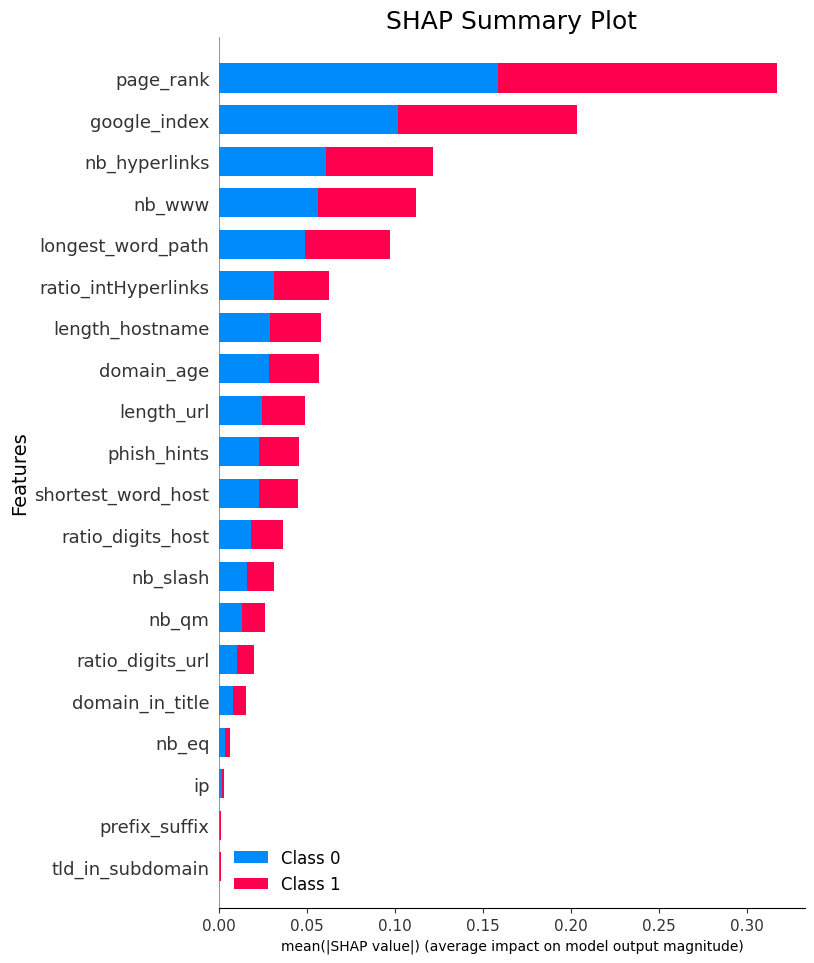

In [77]:
rf.fit(X, y)
# Train the model on the entire dataset

# Create a SHAP explainer

explainer = shap.Explainer(rf, X)

# Calculate SHAP values

shap_values = explainer.shap_values(X)

# Plot the SHAP values (if needed)

shap.summary_plot(shap_values, X, show=False)

# Set title and axis label font sizes for better visibility

plt.title("SHAP Summary Plot", fontsize=18)
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)", fontsize=10)
plt.ylabel("Features", fontsize=14)
plt.savefig('1.pdf', bbox_inches='tight', transparent = True, dpi=300)